In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import pandas as pd

In [6]:
iris = load_iris()
X = iris.data
y = iris.target
feature_names= iris.feature_names
target_names= iris.target_names

In [7]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [8]:
scaler = StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [9]:
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [10]:
y_pred= knn.predict(X_test_scaled)

In [11]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.93


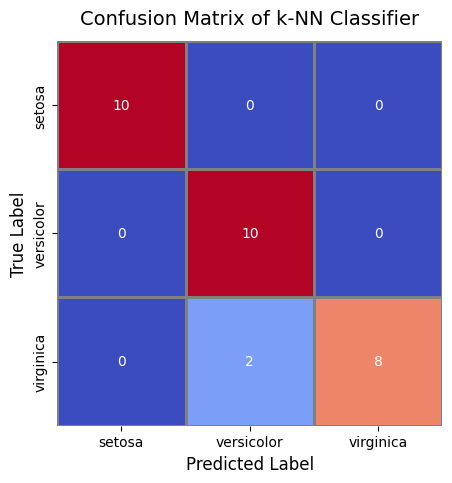

In [12]:
plt.figure(figsize=(6,5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=target_names, yticklabels=target_names,cbar=False, linewidths=1, linecolor='gray', square=True)
plt.title("Confusion Matrix of k-NN Classifier", fontsize=14, pad=12)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.show()

In [13]:
X_2d = X[:, :2]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2d, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
scaler2 = StandardScaler()
X_train2_scaled = scaler2.fit_transform(X_train2)
X_test2_scaled = scaler2.transform(X_test2)

In [15]:
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(X_train2_scaled, y_train2)

KNeighborsClassifier()

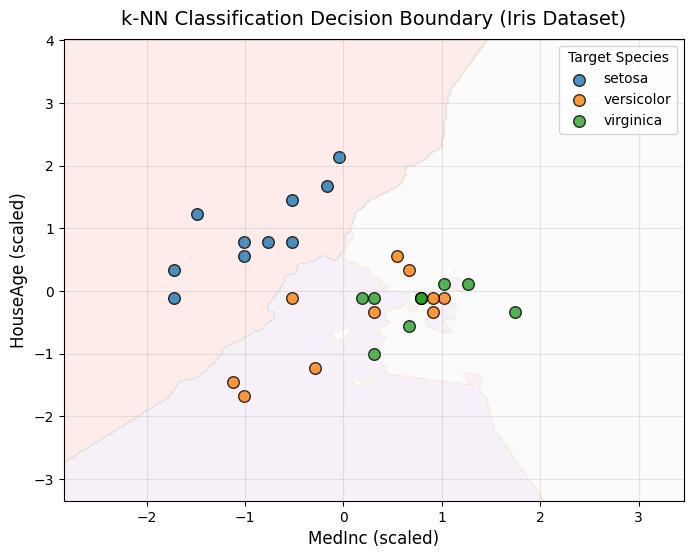

In [51]:
x_min, x_max= X_train2_scaled[:, 0].min() -1, X_train2_scaled[:, 0].max() + 1
y_min, y_max= X_train2_scaled[:, 1].min() -1, X_train2_scaled[:, 1].max() + 1
xx, yy= np.meshgrid(np.linspace(x_min, x_max, 300),np.linspace(y_min, y_max, 300))
Z = knn2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.25, cmap='Pastel1')
colors = ['#1f77b4', '#ff7f0e',"#29a029"]

for i, target_name in enumerate(target_names):
    plt.scatter(
            X_test2_scaled[y_test2 == i, 0],
            X_test2_scaled[y_test2 == i, 1],
            label=target_name,s=70, edgecolor='k', alpha=0.8, color=colors[i])
    plt.xlabel(feature_names[0] + " (scaled)", fontsize=12)
    plt.ylabel(feature_names[1] + " (scaled)", fontsize=12)
    plt.title("k-NN Classification Decision Boundary (Iris Dataset)", fontsize=14, pad=10)
    plt.legend(title="Target Species")
    plt.grid(alpha=0.3)
plt.show()

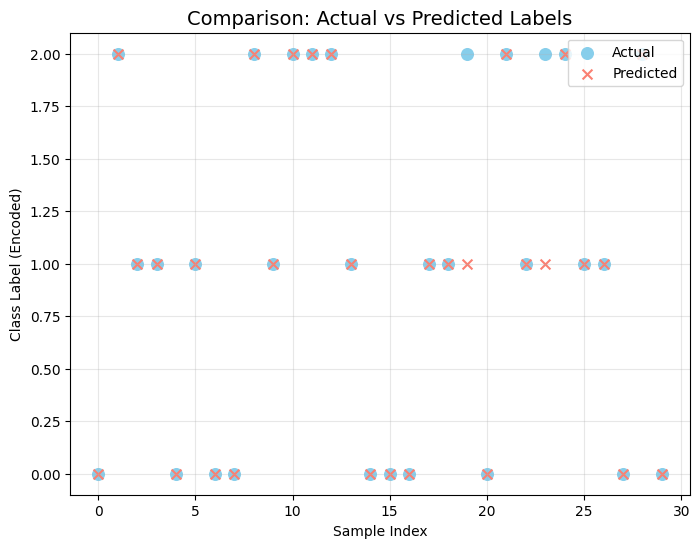

In [22]:
plt.figure(figsize=(8,6))
plt.scatter(range(len(y_test)), y_test, label='Actual', c='skyblue', s=70)
plt.scatter(range(len(y_pred)), y_pred, label='Predicted', c='salmon', s=50, marker='x')
plt.title("Comparison: Actual vs Predicted Labels", fontsize=14)
plt.xlabel("Sample Index")
plt.ylabel("Class Label (Encoded)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

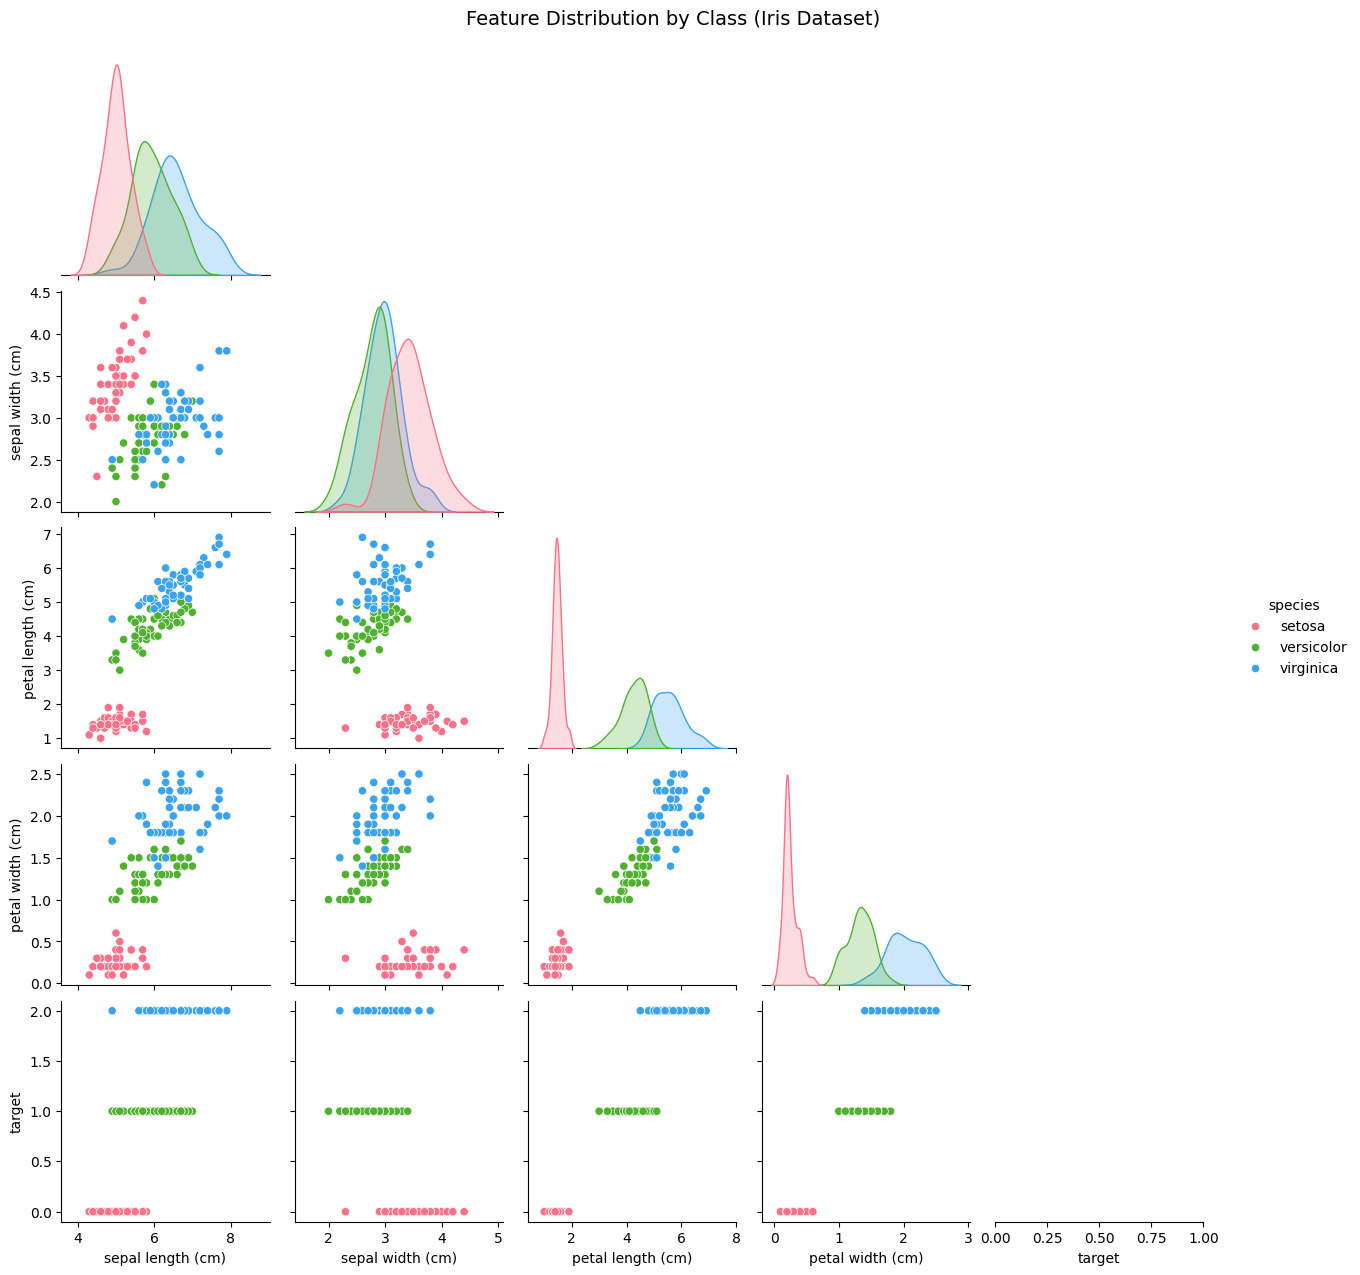

In [23]:
df_iris= pd.DataFrame(X, columns=feature_names)
df_iris['target'] = y
df_iris['species'] = [target_names[i] for i in y]
sns.pairplot(df_iris, hue="species", diag_kind="kde", palette="husl", corner=True)
plt.suptitle("Feature Distribution by Class (Iris Dataset)", y=1.02, fontsize=14)
plt.show()

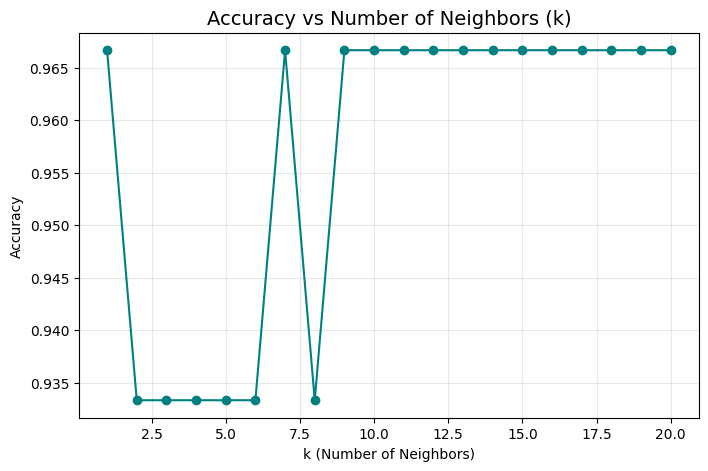

In [26]:
k_values= range(1, 21)
acc_scores= []
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    acc_scores.append(accuracy_score(y_test, model.predict(X_test_scaled)))

plt.figure(figsize=(8,5))
plt.plot(k_values,acc_scores,marker='o',color='teal')
plt.title("Accuracy vs Number of Neighbors (k)", fontsize=14)
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.grid(alpha=0.3)
plt.show()

In [29]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [30]:
iris = datasets.load_iris()
X, y = iris.data, iris.target
target_names= iris.target_names

In [31]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [32]:
svc = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svc.fit(X_train, y_train)
y_pred= svc.predict(X_test)

In [33]:
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=target_names))

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



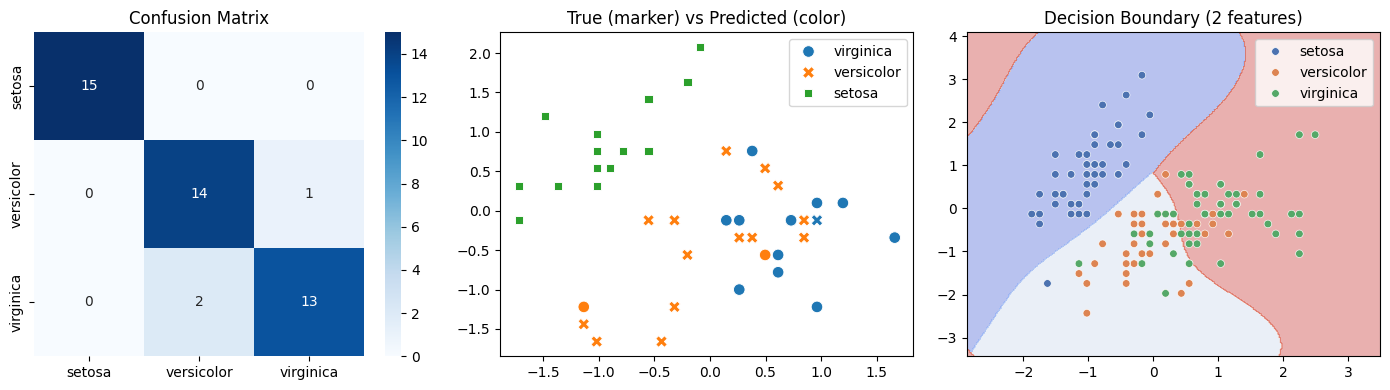

In [42]:
plt.figure(figsize=(14, 4))

plt.subplot(1, 3, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=target_names, yticklabels=target_names)
plt.title("Confusion Matrix")

plt.subplot(1, 3, 2)
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1],
                hue=[target_names[i] for i in y_pred],
                style=[target_names[i] for i in y_test], s=70)
plt.title("True (marker) vs Predicted (color)")

plt.subplot(1, 3, 3)
X2 = X[:, :2]
X2_scaled = scaler.fit_transform(X2)
svc2d = SVC(kernel='rbf', gamma='auto').fit(X2_scaled, y)
x_min, x_max= X2_scaled[:, 0].min()-1, X2_scaled[:, 0].max()+1
y_min, y_max= X2_scaled[:, 1].min()-1, X2_scaled[:, 1].max()+1
xx, yy= np.meshgrid(np.arange(x_min, x_max, 0.02),np.arange(y_min, y_max, 0.02))
Z = svc2d.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4, cmap="coolwarm")
sns.scatterplot(x=X2_scaled[:, 0], y=X2_scaled[:, 1],
                hue=[target_names[i] for i in y], s=30, palette="deep")
plt.title("Decision Boundary (2 features)")
plt.tight_layout()
plt.show()

In [45]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

housing = fetch_california_housing()
X, y = housing.data, housing.target
feature_names= housing.feature_names

In [47]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

scaler_X= StandardScaler()
scaler_y= StandardScaler()

X_train_scaled= scaler_X.fit_transform(X_train)
X_test_scaled= scaler_X.transform(X_test)
y_train_scaled= scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()

In [48]:
svr= SVR(kernel='rbf', C=10, gamma='scale', epsilon=0.1) 
svr.fit(X_train_scaled, y_train_scaled)

y_pred_scaled= svr.predict(X_test_scaled)
y_pred= scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

mse= mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MeanSquared Error (MSE): {mse:.3f}")
print(f"R² Score: {r2:.3f}")

MeanSquared Error (MSE): 0.322
R² Score: 0.754


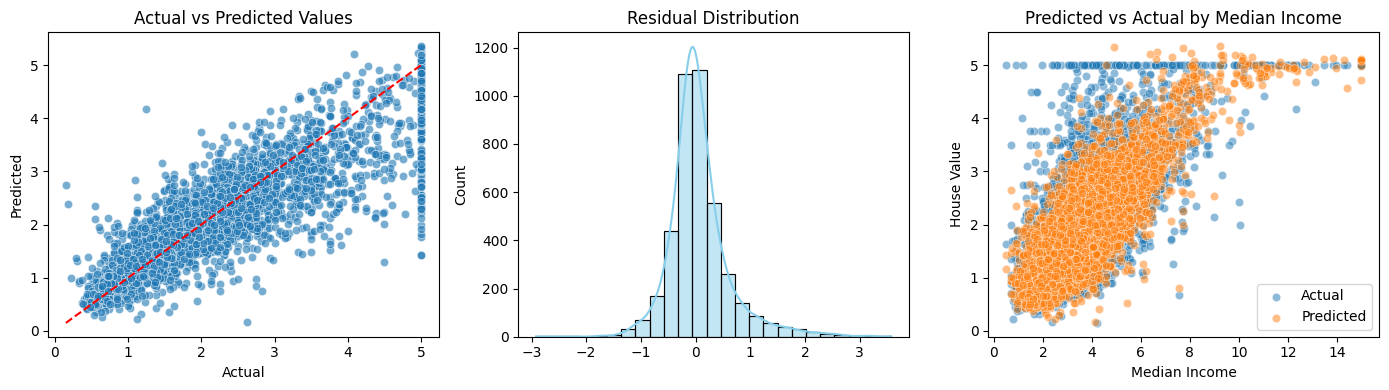

In [50]:
plt.figure(figsize=(14, 4))

plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Values")

plt.subplot(1, 3, 2)
residuals = y_test-y_pred
sns.histplot(residuals, kde=True, bins=25, color='skyblue')
plt.title("Residual Distribution")

plt.subplot(1, 3, 3)
feature_idx= feature_names.index('MedInc')  # Median Income
sns.scatterplot(x=X_test[:, feature_idx], y=y_test, label="Actual", alpha=0.5)
sns.scatterplot(x=X_test[:, feature_idx], y=y_pred, label="Predicted", alpha=0.5)
plt.xlabel("Median Income")
plt.ylabel("House Value")
plt.title("Predicted vs Actual by Median Income")
plt.legend()
plt.tight_layout()
plt.show()